# Lab 5: The simple pendulum

- Another common example of a mechanical system which exhibits
  oscillatory motion is the ``simple'' pendulum.
- Idealized system consisting of a particle or ``bob'' of mass $m$
  attached to the lower end of a rigid rod of length $L$ and
  negligible mass.  The upper end of the rod pivots without friction.
- The pendulum swings in a vertical plane.

- item The bob is constrained to move along an arc of a circle of
  radius $L$.
- The bob's position is specified by $L$ and the angle $\theta$.
- Linear velocity and acceleration of the bob as measured along
  the arc are given by

\begin{align}
v = L\frac{d \theta}{dt} \\
a =  L \frac{d^2 \theta}{dt^2}
\end{align}

- Two forces act on the bob:  the force $mg$ vertically downward
  and the force of the rod.
- The rod does not exert a force along the arc, so we need to
  consider only the component of $m {\rm \bf g}$ along the arc, or $mg \sin
  \theta$. The equation of motion is

\begin{equation}
mL \frac{d^2 \theta}{dt^2} = -mg \sin \theta 
\end{equation}

- The pendulum is an example of a {\em non-linear} equation since
  $\sin \theta$ appears rather than $\theta$.
- Most non-linear equations do not have analytical solutions.
- However, if the pendulum has small amplitude oscillations, then
  $\sin \theta \approx \theta$, and the equation of motion reduces to

\begin{equation*}
\frac{d^2 \theta}{dt^2} \approx -\frac{g}{L} \theta
\end{equation*}

- Note that this equation is identical in form to the mass on a
  spring, i.e., 

\begin{equation*}
\frac{d^2 x}{dt^2} \approx -\omega_0^2 x
\end{equation*}

- We immediately conclude that

\begin{equation*}
T = 2 \pi \sqrt{L/g}
\end{equation*}

- One way to understand the motion of a pendulum with large
  oscillations is to solve the non-linear equation of motion
  numerically.
- A numerical solution must be consistent with energy
  conservation!
- The potential energy by noting that if the bob is deflected by
  angle $\theta$, the bob is raised by the distance $h = L -L \cos
  \theta$ (see Figure). Thus,

\begin{equation*}
U = mgh = mgL(1 - \cos \theta)
\end{equation*}

where the zero potential energy corresponds to $\theta = 0$.
- The kinetic energy is

\begin{equation*}
\frac{1}{2} m v^2 = \frac{1}{2} m L^2 \left(\frac{d \theta}{d
    t}\right )^ 2
\end{equation*}

- The total energy is

\begin{equation*}
E = \frac{1}{2} m L^2 \left(\frac{d \theta}{d
    t}\right )^ 2 +  mgL(1 - \cos \theta)
\end{equation*}

## Exercise 1

1. Write a python program to simulate small amplitude oscillations of the simple pendulum.  Since $\sin \theta \approx \theta$, the problem is identical to the mass on a spring problem.  In this case, $x \rightarrow  \theta$, $v \rightarrow \omega = d \theta/dt$ and $k/m \rightarrow g/L$.  In this context, $\omega$ is the angular velocity of the pendulum bob.  What are the units of $g/L$?  Choose $g/L =9$ and the initial conditions $\theta^0 = 0.1$, $\omega^0 = 0$ and determine the period.

2. Modify your program to simulate large(r) amplitude oscillations.  Set $g/L =9$ and choose $\Delta t$ so that the numerical method generates a stable solution.  Check the stability of the solution by monitoring the total energy and ensure that it does not drift (too much) from its initial value.

3. Set $\omega^0 = 0$ and make plots of $\theta(t)$ and $\omega(t)$ for the initial conditions $\theta^0 = [0.1, 0.2, 0.4, 0.8, 1.0]$. (Remember that $\theta$ is measured in radians and is restricted to $|\theta| \lt \pi/2$.) Describe the qualitative behavior of $\theta$ and $\omega$.  What is the period $T$ and amplitude $\theta_{max}$ in each case?  Plot $T$ vs. $\theta_{max}$ and discuss the qualitative dependence of the period on the amplitude.  How  do your results for $T$ compare i the linear and non-linear cases, e.g., which period is larger?  Explain the relative values of $T$ in physical terms.

**Jasmine Kobayashi(JK) answer:**

Qualitative dependence of period on (max) amplitude: As max amplitude gets larger, period gets longer. 

Periods: nonlinear > linear. 

Exercise 1,pt. 1;theta0 = 0.1 & omega0 = 0.0: Period= 2.0943951023931953 seconds
theta0 = 0.1 rad: T = 2.094395102393065 sec
theta0 = 0.2 rad: T = 2.1027726828026374 sec
theta0 = 0.4 rad: T = 2.1153390534171956 sec
theta0 = 0.8 rad: T = 2.1823596966937666 sec
theta0 = 1.0 rad: T = 2.232625179151195 sec


Text(0, 0.5, 'Period (sec)')

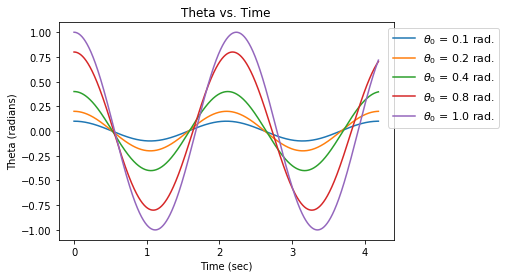

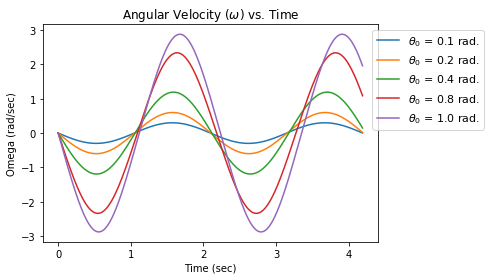

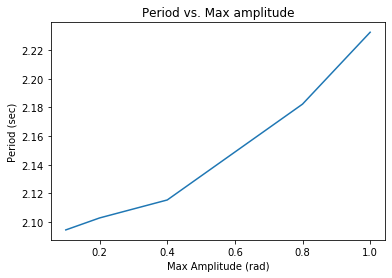

In [2]:
#Name: Jasmine Kobayashi
#Date:2/13/20
#Lab5: The simple pendulum
#---------------------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#---------------------------------------------------------------------------------------------------------------------------
g下L = 9                     #(g/L) (g=acceleration of gravity,L = length of pendulum) (units = sec^-2)     #omega2
T = 2*np.pi/np.sqrt(g下L)    #Period (units = seconds) 
dt = 0.001*T                 #time step, in relation to period
theta = 0.1                  #initial angle (theta0) (radians)                                              #=x0 of mass on spring
av0 = 0.0                    #initial angular velocity (omega0)                                             #=v0 of mass on spring
tfinal = 2*T                 #final time (in relation to how many periods)
print("Exercise 1,pt. 1;theta0 = 0.1 & omega0 = 0.0: Period=",T,"seconds")

def vdot(g下L,theta):        #acceleration(omega-dot);(b/c theta"(t) = -(g/l)*sin(theta))
    return -g下L*np.sin(theta)

#Modified Euler
def SHO_mod(theta,av0,g下L,T,dt):  
    xm = []                       #amplitude (theta)
    vm = []                       #angular velocity (omega)
    time_m = []                   #time
    t = 0.0                       #initial time
    while t < tfinal:
        time_m.append(t)
        xm.append(theta)
        vm.append(av0)
        thph = theta +(0.5)*av0*dt              #x^n+0.5 = x^n + (1/2)*(F^n)*dt
        avp = av0 + vdot(g下L,thph)*dt          #F^n+1; v^n+1 using x^n+0.5
        avph = av0 + (vdot(g下L,theta)*dt)/2    #F^n+0.5 (v^n+0.5)   
        thp = theta + avph*dt                   #x^n+1 = x^n + (F^n+0.5)*dt   
        theta = thp
        av0 = avp
        t = t + dt                 
    return xm, vm, time_m

[thm,avm,時m] = SHO_mod(theta,av0,g下L,T,dt)
#Changing initial theta
[thm1,avm1,時m1] = SHO_mod(0.1,av0,g下L,T,dt)
[thm2,avm2,時m2] = SHO_mod(0.2,av0,g下L,T,dt)
[thm3,avm3,時m3] = SHO_mod(0.4,av0,g下L,T,dt)
[thm4,avm4,時m4] = SHO_mod(0.8,av0,g下L,T,dt)
[thm5,avm5,時m5] = SHO_mod(1.0,av0,g下L,T,dt)
#Max amplitudes
amax1 = np.max(thm1[1:])
amax2 = np.max(thm2[1:])
amax3 = np.max(thm3[1:])
amax4 = np.max(thm4[1:])
amax5 = np.max(thm5[1:])
#Periods of the different initial thetas
T1 = np.abs(((時m1[thm1.index(amax1)]) - (時m1[thm1.index(np.min(thm1))]))*2)
T2 = np.abs(((時m2[thm2.index(amax2)]) - (時m2[thm2.index(np.min(thm2))]))*2)
T3 = np.abs(((時m3[thm3.index(amax3)]) - (時m3[thm3.index(np.min(thm3))]))*2)
T4 = np.abs(((時m4[thm4.index(amax4)]) - (時m4[thm4.index(np.min(thm4))]))*2)
T5 = np.abs(((時m5[thm5.index(amax5)]) - (時m5[thm5.index(np.min(thm5))]))*2)

amax = [amax1,amax2,amax3,amax4,amax5]
Tm = [T1,T2,T3,T4,T5]
print("theta0 = 0.1 rad: T =",T1,"sec")
print("theta0 = 0.2 rad: T =",T2,"sec")
print("theta0 = 0.4 rad: T =",T3,"sec")
print("theta0 = 0.8 rad: T =",T4,"sec")
print("theta0 = 1.0 rad: T =",T5,"sec")

#Graphs
plt.figure(1)
#plt.plot(時m,thm,"k")
plt.plot(時m1,thm1,label="$\\theta_0$ = 0.1 rad.")
plt.plot(時m2,thm2,label="$\\theta_0$ = 0.2 rad.")
plt.plot(時m3,thm3,label="$\\theta_0$ = 0.4 rad.")
plt.plot(時m4,thm4,label="$\\theta_0$ = 0.8 rad.")
plt.plot(時m5,thm5,label="$\\theta_0$ = 1.0 rad.")
plt.legend(fontsize = 11,loc='upper center',bbox_to_anchor=(1.15,1.0))
plt.title("Theta vs. Time")
plt.xlabel("Time (sec)")
plt.ylabel("Theta (radians)")

plt.figure(2)
#plt.plot(時m,avm,"k")
plt.plot(時m1,avm1,label="$\\theta_0$ = 0.1 rad.")
plt.plot(時m2,avm2,label="$\\theta_0$ = 0.2 rad.")
plt.plot(時m3,avm3,label="$\\theta_0$ = 0.4 rad.")
plt.plot(時m4,avm4,label="$\\theta_0$ = 0.8 rad.")
plt.plot(時m5,avm5,label="$\\theta_0$ = 1.0 rad.")
plt.legend(fontsize = 11,loc='upper center',bbox_to_anchor=(1.15,1.0))
plt.title("Angular Velocity ($\omega$) vs. Time")
plt.xlabel("Time (sec)")
plt.ylabel("Omega (rad/sec)")

plt.figure(3)
plt.plot(amax,Tm)
plt.title("Period vs. Max amplitude")
plt.xlabel("Max Amplitude (rad)")
plt.ylabel("Period (sec)")

Initial Energy(over mL^2)= 0.044962512497767615


Text(0, 0.5, 'Delta n')

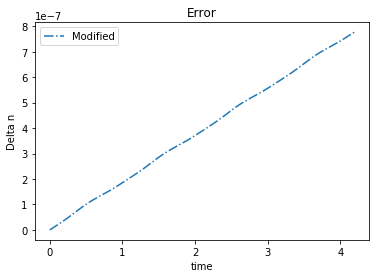

In [21]:
# Energy difference to check for using reasonable dt
E0_下mL2 =g下L*(1-np.cos(theta))               #Initial energy (E0/mL^2)
print("Initial Energy(over mL^2)=",E0_下mL2)

#Modified Euler
Em = []                                      #Total energy 
difm = []                                    #Difference in energy 
for i in range(0,len(thm1)):
    EomL2 = ((0.5)*(avm1[i]**2)) + (g下L*(1-np.cos(thm1[i]))) #E/mL^2 for each step
    Em.append(EomL2)
    dm = (Em[i]-E0_下mL2)/E0_下mL2              #Difference in energy
    difm.append(dm)


plt.plot(時m,difm,"-.",label="Modified")
plt.legend()
plt.title("Error")
plt.xlabel("time")
plt.ylabel("Delta n")

## Exercise 2

The state of motion of a one-dimensional oscillator (e.g., mass on a spring) is completely specified as a function of time if the two quantities $x(t)$ and $v(t)$ are given.  These quantities may be considered to the coordinates of a point in a two-dimensional space, called *phase space*.   As the time increases, the point $[x,y]$ moves along a trajectory in phase space.

4. Obtain several phase space (i.e., $\theta(t)$, $\omega(t)$) plots for the simple pendulum for different values of total energy.  Are the phase space paths closed?  Does the shape of the path depend on the total energy?

**JK answer:**
Phase space paths are closed. And the actual *shape* doesn't depend on total energy.

Text(0, 0.5, 'Angular Velocity ($\\omega$)')

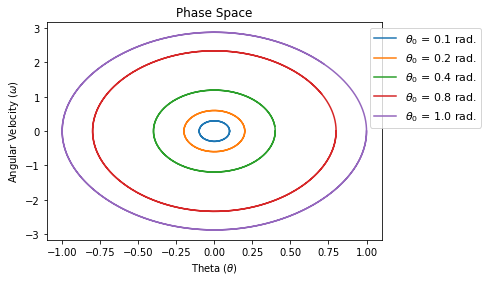

In [3]:
#Phase Space
plt.plot(thm1,avm1,label="$\\theta_0$ = 0.1 rad.")   
plt.plot(thm2,avm2,label="$\\theta_0$ = 0.2 rad.")
plt.plot(thm3,avm3,label="$\\theta_0$ = 0.4 rad.")
plt.plot(thm4,avm4,label="$\\theta_0$ = 0.8 rad.")
plt.plot(thm5,avm5,label="$\\theta_0$ = 1.0 rad.")
plt.legend(fontsize = 11,loc='upper center',bbox_to_anchor=(1.13,1.0))
plt.title("Phase Space")
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Angular Velocity ($\omega$)")

## Exercise 3

5. Repeat Exercise 1 using *scipy* modules to solve the ODE.  Read the documentation on the scipy.integrate class and comment the code below.  Calculate the total energy as a function of time (as before) and compare with your second order method.  

Text(0, 0.5, 'Delta n')

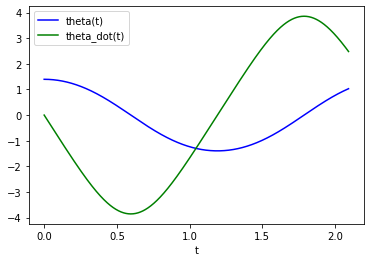

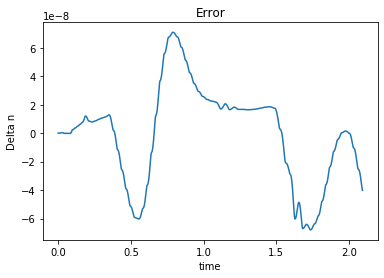

In [4]:
from scipy.integrate import odeint

def pendulum(y, t, b, c):                   #y = array of value of y for each t; t = sequence of time points to solve for y; b & c = constants
    [theta, theta_dot] = y                          #y captures both theta and theta-dot(=omega)
    dydt = [theta_dot, b - c*np.sin(theta)]         #converting to system of first order equations; theta'(t) = ang. vel. = theta-dot; theta"(t)= omega'(t) = b-c(sin(theta)) 
    return dydt                                     #dydt: captures both ODEs (coupled ODE) (has both theta'(t) & omega'(t))

theta_0 = 80*np.pi/180.                     #initial angle theta (in radians)
theta_dot_0 = 0.0                           #initial angular velocity

tfinal = T                                  #Ending after one period
y0 = [theta_0,theta_dot_0]                  #initial y conditions
tm = np.arange(0,tfinal,dt)                 #time for time=0 to one period

sol = odeint(pendulum, y0, tm, args=(0,g下L))        #odeint solution; using: intial y, time specified by tm, b = 0,c = g/L
                                                     #the solution holds two parts, both the theta and theta-dot(=omega)
plt.figure(5) 
plt.plot(tm, sol[:, 0], 'b', label='theta(t)')       #":,0" is to indicate to use only theta (1st column of sol)
plt.plot(tm, sol[:, 1], 'g', label='theta_dot(t)')   #":,1" is to use only theta-dot(= omega) (2nd column of sol)
plt.legend(loc='best')
plt.xlabel('t')

E0_over_mL2 = g下L*(1-np.cos(sol[0,0]))              #initial E/m(L^2) (or initial energy)
E_over_mL2 = 0.5*sol[:,1]**2 + g下L*(1-np.cos(sol[:,0]))  #Total energy (over mL^2)
Delta_n = (E_over_mL2-E0_over_mL2)/E0_over_mL2       #Delta n

plt.figure(6)
plt.plot(tm,Delta_n)
plt.title("Error")
plt.xlabel("time")
plt.ylabel("Delta n")
